# Simulação Completa: Projeto de Filtros IIR (Capítulo 8)

## 1. Introdução
Esta simulação abrange os principais métodos de projeto IIR:
1. Butterworth

    Característica: Resposta monotônica (sem ripple) em ambas as bandas.

    Vantagem: Banda de passagem maximamente plana.
2. Chebyshev Tipo I

    Característica: Ripple na banda de passagem, transição mais abrupta que Butterworth.

    Vantagem: Melhor relação entre ordem do filtro e largura da banda de transição.
3. Chebyshev Tipo II

    Característica: Ripple na banda de rejeição, banda de passagem plana.

    Vantagem: Atenuação controlada na stopband sem afetar a passagem.
4. Elíptico (Cauer)

    Característica: Ripple em ambas as bandas, transição mais estreita.
    
    Vantagem: Menor ordem necessária para uma dada especificação.

/tmp/ipython-input-2-1925272229.py:86: UserWarning: The filter's denominator is extremely small at frequencies [3.137, 3.138, 3.140], around which a singularity may be present
  w, gd = group_delay((b, a), w=2000, fs=fs)


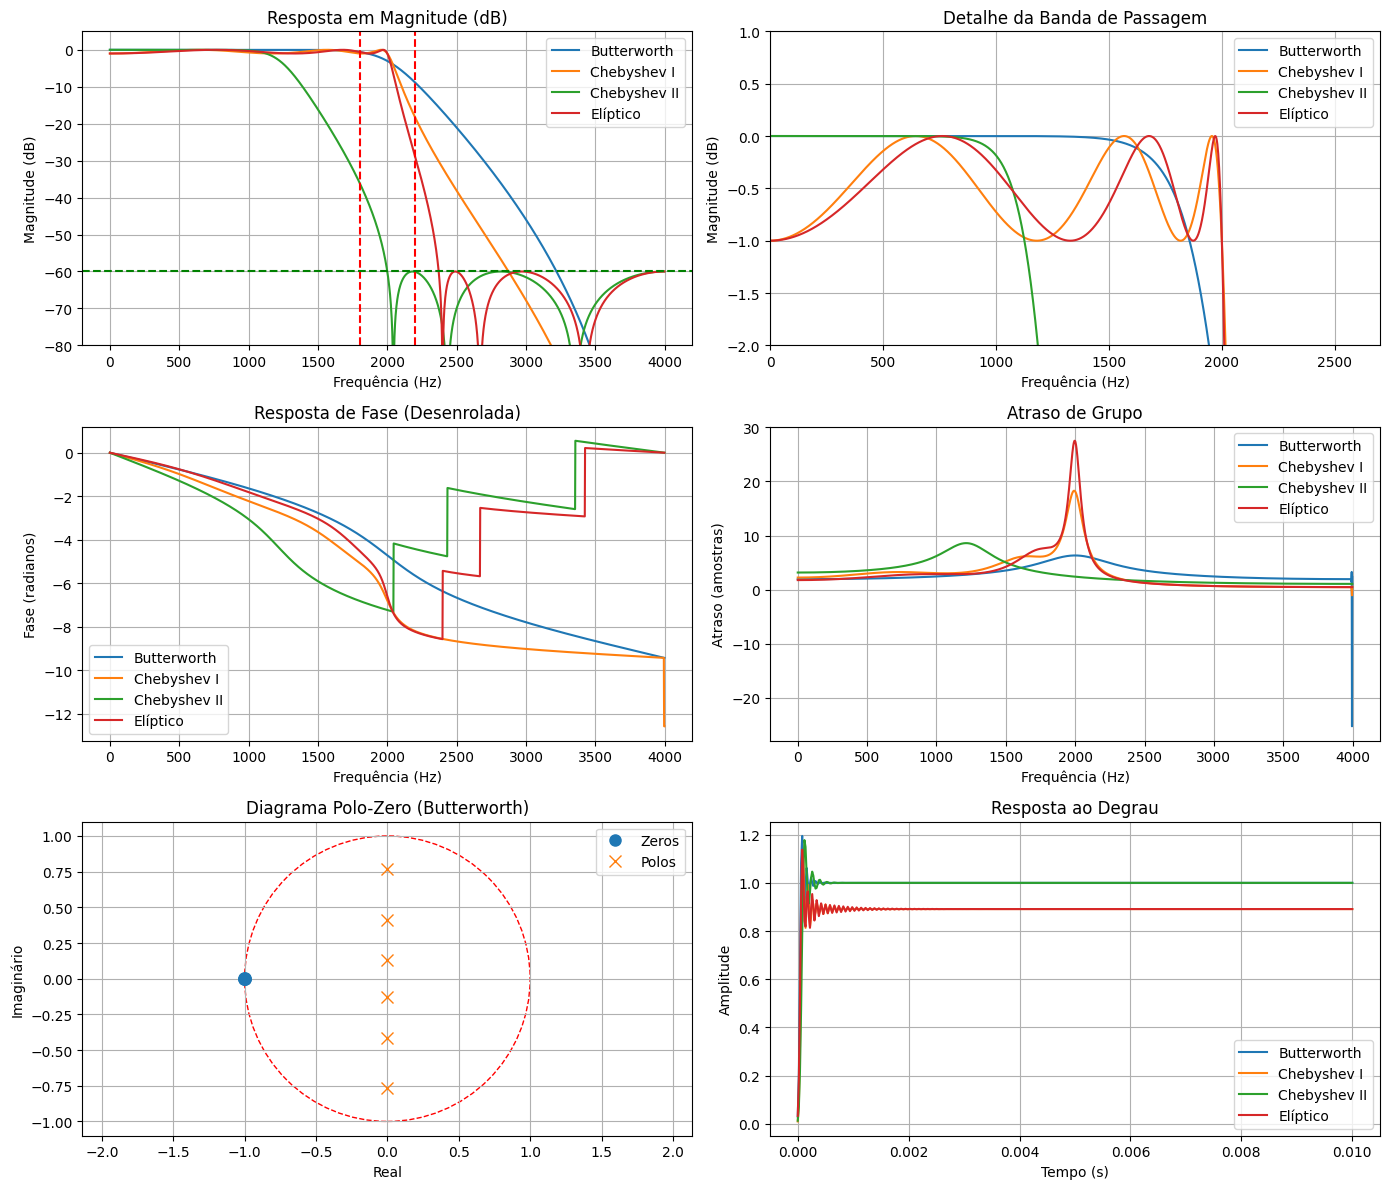

In [2]:
import numpy as np
from scipy.signal import butter, cheby1, cheby2, ellip, freqz, group_delay, tf2zpk, lfilter
import matplotlib.pyplot as plt

# Parâmetros comuns
fs = 8000  # Frequência de amostragem
fp = 1800  # Frequência de passagem
fs_stop = 2200  # Frequência de rejeição
Rp = 1     # Ripple na passagem (dB)
As = 60    # Atenuação na stopband (dB)

# Cálculo das frequências normalizadas
wp = fp / (fs/2)
ws = fs_stop / (fs/2)

# Projeto dos filtros IIR
N = 6  # Ordem do filtro

# 1. Butterworth
b_butter, a_butter = butter(N, (fp + fs_stop)/2, btype='lowpass', fs=fs)

# 2. Chebyshev Tipo I (ripple na passagem)
b_cheby1, a_cheby1 = cheby1(N, Rp, (fp + fs_stop)/2, btype='lowpass', fs=fs)

# 3. Chebyshev Tipo II (ripple na stopband)
b_cheby2, a_cheby2 = cheby2(N, As, (fp + fs_stop)/2, btype='lowpass', fs=fs)

# 4. Elíptico (ripple em ambas)
b_ellip, a_ellip = ellip(N, Rp, As, (fp + fs_stop)/2, btype='lowpass', fs=fs)

# Criação da figura
plt.figure(figsize=(14, 12))

# Resposta em Magnitude
plt.subplot(3, 2, 1)
for (b, a), label in zip([(b_butter, a_butter), (b_cheby1, a_cheby1),
                         (b_cheby2, a_cheby2), (b_ellip, a_ellip)],
                        ['Butterworth', 'Chebyshev I', 'Chebyshev II', 'Elíptico']):
    w, H = freqz(b, a, worN=2000, fs=fs)
    plt.plot(w, 20*np.log10(np.abs(H)), label=label)
plt.title('Resposta em Magnitude (dB)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.axvline(fp, color='r', linestyle='--')
plt.axvline(fs_stop, color='r', linestyle='--')
plt.axhline(-As, color='g', linestyle='--')
plt.grid(True)
plt.legend()
plt.ylim(-80, 5)

# Detalhe da Passagem
plt.subplot(3, 2, 2)
for (b, a), label in zip([(b_butter, a_butter), (b_cheby1, a_cheby1),
                         (b_cheby2, a_cheby2), (b_ellip, a_ellip)],
                        ['Butterworth', 'Chebyshev I', 'Chebyshev II', 'Elíptico']):
    w, H = freqz(b, a, worN=2000, fs=fs)
    plt.plot(w, 20*np.log10(np.abs(H)), label=label)
plt.xlim([0, fp*1.5])
plt.ylim([-2, 1])
plt.title('Detalhe da Banda de Passagem')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()

# Resposta de Fase
plt.subplot(3, 2, 3)
for (b, a), label in zip([(b_butter, a_butter), (b_cheby1, a_cheby1),
                         (b_cheby2, a_cheby2), (b_ellip, a_ellip)],
                        ['Butterworth', 'Chebyshev I', 'Chebyshev II', 'Elíptico']):
    w, H = freqz(b, a, worN=2000, fs=fs)
    phase = np.unwrap(np.angle(H))
    plt.plot(w, phase, label=label)
plt.title('Resposta de Fase (Desenrolada)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()

# Atraso de Grupo (com tratamento do warning)
plt.subplot(3, 2, 4)
for (b, a), label in zip([(b_butter, a_butter), (b_cheby1, a_cheby1),
                         (b_cheby2, a_cheby2), (b_ellip, a_ellip)],
                        ['Butterworth', 'Chebyshev I', 'Chebyshev II', 'Elíptico']):
    with np.errstate(all='ignore'):  # Ignora warnings numéricos
        w, gd = group_delay((b, a), w=2000, fs=fs)
        plt.plot(w, gd, label=label)
plt.title('Atraso de Grupo')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Atraso (amostras)')
plt.grid(True)
plt.legend()

# Diagrama Polo-Zero (Butterworth como exemplo)
plt.subplot(3, 2, 5)
zeros, poles, _ = tf2zpk(b_butter, a_butter)
plt.plot(np.real(zeros), np.imag(zeros), 'o', markersize=8, label='Zeros')
plt.plot(np.real(poles), np.imag(poles), 'x', markersize=8, label='Polos')
circle = plt.Circle((0, 0), 1, fill=False, color='r', linestyle='--')
plt.gca().add_patch(circle)
plt.title('Diagrama Polo-Zero (Butterworth)')
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.grid(True)
plt.axis('equal')
plt.legend()

# Resposta ao Degrau
plt.subplot(3, 2, 6)
t = np.linspace(0, 0.01, 500)
step_signal = np.ones_like(t)
for (b, a), label in zip([(b_butter, a_butter), (b_cheby1, a_cheby1),
                         (b_cheby2, a_cheby2), (b_ellip, a_ellip)],
                        ['Butterworth', 'Chebyshev I', 'Chebyshev II', 'Elíptico']):
    step_response = lfilter(b, a, step_signal)
    plt.plot(t, step_response, label=label)
plt.title('Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()